# Transformácia náhodnej premennej

## Lineárna transformácia

Predpokladajme, že náhodná premenná $X$ je transformovaná nejakou monotónnou funkciou na premennú $Y$ podľa vzťahu
\begin{align}
\nonumber
Y &= g(X)
\\
\nonumber
X &= g^{-1}(Y) = h(Y)
\end{align}

Ak poznáme $f_X(x)$, potom môžeme vypočítať $f_Y(y)$ podľa nasledujúceho postupu. Predpokladajme, že pre malé zmeny rozsahu hodnôt premenných $dx$ a $dy$ platí

\begin{equation}
P(X \in [x, x+dx]) = P(Y \in [y, y+dy]) \quad (dx > 0)
\end{equation}

z čoho vyplýva

\begin{equation}
\int\limits_{x}^{x+dx} f_X(z)\, dz =
\begin{cases} 
\text{ } \int\limits_{y}^{y+dy} f_Y(z) \, dz  \quad \text{pre} \,\, dy > 0\\ 
\text{-} \int\limits_{y}^{y+dy} f_Y(z) \, dz  \quad \text{pre} \,\, dy < 0
\end{cases}
\end{equation}

Porovnaním podintegrálnych funkcií dostaneme

\begin{equation}
f_X(x) \, dx = f_Y(y)\, \vert dy \vert 
\end{equation}

\begin{equation}
f_Y(y) = \bigg\vert \frac{dx}{dy} \bigg\vert \,\, f_X \big[ h(y) \big]
\end{equation}

S využitím

\begin{equation}
1 = \frac{d}{dx} x = \frac{d}{dx} h(y) = \frac{d \, h(y)}{dy} \frac{dy}{dx}
\end{equation}

\begin{equation}
\frac{dx}{dy} = h^{'}(y) 
\end{equation}

dostaneme finálny vzťah pre všeobecnú transformáciu funkcie rozdelenia hustoty pravdepodobnost

\begin{equation}
f_Y(y) = \vert \, h^{'}(y) \, \vert \, f_X \big[ h(y) \big] 
\end{equation}


<b>Príklad</b>

Predpokladajme lineárnu transformáciu $Y = g(X) = aX + b$, kde $a \neq 0$, $ b \in R $. 

Potom inverzná transformácia má tvar

\begin{equation}
X = h(Y) = \frac {Y-b} {a}  
\end{equation}

\begin{equation}
h^{'}(y) = \frac {1} {a}
\end{equation}

Dosadením do tranformačného vzťahu

\begin{equation}
f_Y(y) = \vert h^{'}(y) \vert \, f_X \big[ h(y) \big]
\end{equation}

dostaneme

\begin{equation}
f_Y(y) = \bigg\vert \frac{1}{a} \bigg\vert \, \frac{1}{\sigma_X \sqrt{2 \pi}} \, exp \, \bigg\lbrace \frac{-[(y-b)/a-\mu_x]^2} {2 \sigma_X^2} \bigg\rbrace
\end{equation}


\begin{equation}
=  \frac{1}{a \, \sigma_X \sqrt{2 \pi}} \, exp \, \bigg\lbrace \frac{-[(y-(a \mu_x+b)]^2} {2 a^2 \sigma_X^2} \bigg\rbrace
\end{equation}

Pri lineárnej transformácii normálneho rozdelenia je výsledkom znova normálne rozdelenie, v tomto prípade s parametrami $\mu_y = a \mu_x +b$ a $\sigma_Y^2 = a^2 \sigma_X^2$. 


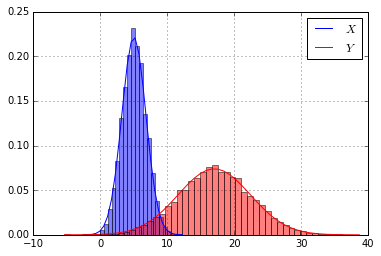

In [1]:
%reset -f  
%matplotlib inline

from numpy import *
from numpy.random import normal, randn
import matplotlib.pyplot as plt


mean1, sigma1 = 5., 1.8          
X = normal(mean1, sigma1, 10000)  # vygenerovanie nahodnej premennej

a=3.                              # transformacia hodnot nahodnej premennej
b=2.
Y = a*X + b                       # linearna transformacia hodnot Y = g(X)

mean2  = a * mean1 + b            # analyticky vypocet
sigma2 = a * sigma1

_, x, _ = plt.hist(X, 25, normed=True, alpha=0.5)
plt.plot(x, 1/(sigma1*sqrt(2 * pi))*exp(-(x - mean1)**2 / (2*sigma1**2) ), 'b-', 
label=r'$X$')

_, z, _ = plt.hist(Y, 50, normed=True, alpha=0.5, color='red')
plt.plot(z, 1/(a*sigma1*sqrt(2 * pi))*exp(-(z - mean2)**2 / (2*sigma2**2) ), 'r-', 
label=r'$Y$')
plt.grid()
plt.legend()
plt.show()

## Nelineárna transformácia


<b> Príklad</b>

Predpokladajme nelineárnu transformáciu $Y = g(X) = X^3$, kde $X \sim \mathcal{N}(0, \sigma_X^2)$. 

Potom 

\begin{equation}
X = h(Y) = Y^{\frac{1}{3}}
\end{equation}

\begin{equation}
h^{'}(y) = \frac{y^{-\frac{2}{3}}} {3}
\end{equation}


Dosadením do tranformačného vzťahu

\begin{equation}
f_Y(y) = \vert h^{'}(y) \vert \, f_X \big[ h(y) \big]
\end{equation}

dostaneme

\begin{equation}
f_Y(y) = \frac{y^{-\frac{2}{3}}}{3}  \frac{1}{\sigma_X \sqrt{2 \pi}} \, exp \, \bigg\lbrace -\frac{x^2} {2 \sigma_X^2} \bigg\rbrace
\end{equation}

\begin{equation}
= \frac{1}{3 y^{\frac{2}{3}}}  \frac{1}{\sigma_X \sqrt{2 \pi}} \, exp \, \bigg\lbrace -\frac{y^\frac{2}{3}} {2 \sigma_X^2} \bigg\rbrace
\end{equation}

Pri nelineárnej transformácii normálneho rozdelenia nie je výsledkom normálne rozdelenie, pre $y \rightarrow 0$ je hodnota rozdelenia divergentná, $f_Y(y) \rightarrow \infty$.  

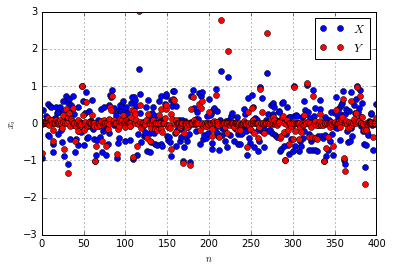

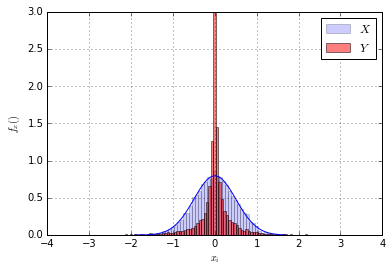

In [2]:
mean1, sigma1 = 0., 0.5         
X = normal(mean1, sigma1, 10000)

Y = X**3        # nelinearna transformacia hodnot Y = g(X)  

t=400
plt.plot(X[0:t], 'bo', label=r'$X$')
plt.plot(Y[0:t], 'ro',  label='$Y$')
plt.ylim(-3, 3)
plt.xlabel('$n$')
plt.ylabel('$x_i$')
plt.legend()
plt.grid()
plt.show()

 
_, x, _ = plt.hist(X, 50, normed=True, alpha=0.2, label=r'$X$')
plt.plot(x, 1/(sigma1*sqrt(2 * pi))*exp(-(x-mean1)**2 / (2*sigma1**2) ), 'b-')
plt.hist(Y, 200, normed=True, alpha=0.5, color='red', label='$Y$')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$f_x()$')
plt.xlim(-4, 4)
plt.ylim(0, 3)
plt.grid()
plt.legend()
plt.show()

Z grafov je zrejmý aj dôvod divergencie $f_Y(y)$ v okolí nuly. Pri transformácii umocnením so strednou hodnotou rovnou nule sa všetky hodnoty náhodnej premennej $Y$ "sťahujú" bližšie k nule (napr. $0.1^3 = 0.001$). V histograme je potom hodnota v okolí nuly približne rovná počtu hodnôt náhodnej premennej, z ktorej bol historgram vypočítaný.

Aj napriek tomu že $f_Y(y)$ je v okolí nuly divergentná, jej integrál je rovný $1.0$.
